# Single node modeling example
We set up a 2D isotropic acoustic modeling operator for a single shot with the source located in the center of the model, and receivers located in a fixed array across the top of the model. 

In [1]:
using PyPlot, WaveFD, JetPackWaveFD, Random

In [2]:
v = read!("../20_marmousi_model_setup/marmousi_vp_20m_176x851.bin", Array{Float32}(undef,176,851));
dz,dx = 20.0,20.0
nz,nx = size(v)
@show dz,dx
@show nz,nx;

(dz, dx) = (20.0, 20.0)
(nz, nx) = (176, 851)


## Note on scratch space for temporary files
When dealing with serialized nonlinear wavefields as in this example, we need to specify the location where scratch files will be written.

You may need to change this to point to a temporary directory available on your system.

In [3]:
scratch = "/mnt/scratch"
@assert isdir(scratch)

In [4]:
F = JopNlProp2DAcoIsoDenQ_DEO2_FDTD(;
    b = ones(Float32,size(v)),
    nthreads = Sys.CPU_THREADS,
    isinterior = true,
    ntrec = 1601,
    dtrec = 0.004,
    dtmod = 0.002,
    dz = dz,
    dx = dx,
    wavelet = WaveletCausalRicker(f=5.0),
    sx = dx*(nx/2),
    sz = dz,
    rx = dx*[0:0.5:nx-1;],
    rz = 2*dz*ones(length(0:0.5:nx-1)),
    srcfieldfile = joinpath(scratch, "field-$(randstring()).bin"),
    reportinterval=1000)

"Jet nonlinear operator, (176, 851) → (1601, 1701)"

In [5]:
d = F*v;

┌ Info: nonlinear forward on cbox-wask-HB60rs, srcfieldfile=/mnt/scratch/field-9L5SJB3O.bin
└ @ JetPackWaveFD /home/cvx/.julia/dev/JetPackWaveFD/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:387
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step     1 of  3201 ;    0.00 MCells/s (IO= 0.00%, EX= 0.00%) -- rms d,p; 0.0000e+00 0.0000e+00
└ @ JetPackWaveFD /home/cvx/.julia/dev/JetPackWaveFD/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:703
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step  1000 of  3201 ;  131.56 MCells/s (IO=48.58%, EX=28.71%) -- rms d,p; 1.3120e+00 9.1300e-01
└ @ JetPackWaveFD /home/cvx/.julia/dev/JetPackWaveFD/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:703
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step  2000 of  3201 ;  148.78 MCells/s (IO=49.68%, EX=26.97%) -- rms d,p; 1.4652e+00 3.8945e-01
└ @ JetPackWaveFD /home/cvx/.julia/dev/JetPackWaveFD/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:703
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time 

In [6]:
# close the modeling operator, to remove seriliazation files
close(F)

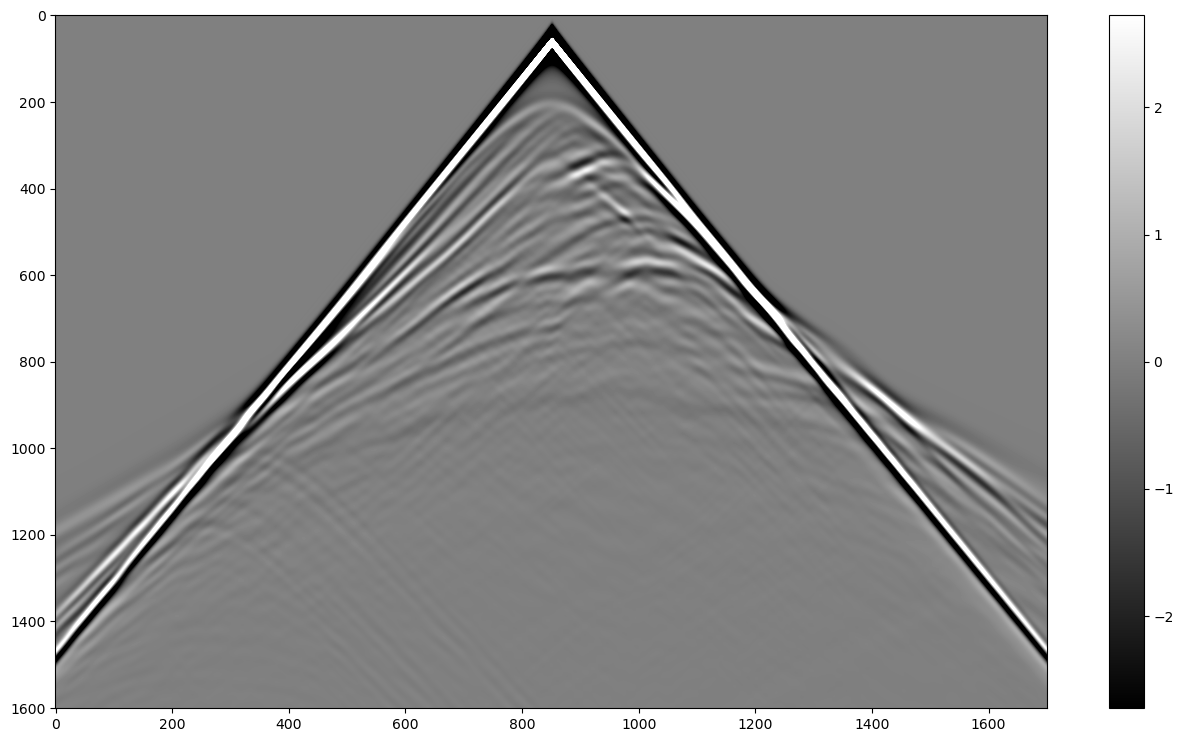

In [7]:
figure(figsize=(16,9)); clf()
imshow(d,aspect="auto", cmap="gray")
dmax = maximum(abs, d)
clim(0.025 .* [-dmax,+dmax])
colorbar();